In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [245]:
# 加载数据
data = pd.read_excel('tele_churn.xlsx')

In [246]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [247]:
# 对分类变量进行 one-hot 编码
data = pd.get_dummies(data, 
                      columns=['gender',
        'Partner', 'Dependents','PhoneService', 
        'MultipleLines', 'InternetService', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 
        'StreamingTV','StreamingMovies', 'Contract', 
        'PaperlessBilling', 'PaymentMethod', 'Churn'],
                      drop_first=True,dtype=int)

In [248]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [249]:
# 拆分特征和目标变量
X = data.drop('Churn_Yes', axis=1)
y = data['Churn_Yes']

In [250]:
# 将数据集拆分为训练集和测试集（70%训练集，30%测试集）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=66)

In [251]:
# 初始化逻辑回归模型，包含所有参数（使用默认值）
model = LogisticRegression(
    penalty='l2',            # 正则化方式，默认L2正则化
    dual=False,              # 对于样本数大于特征数时应为False
    tol=1e-4,                # 容差
    C=1.0,                   # 正则化强度的倒数
    fit_intercept=True,       # 是否包括截距
    #intercept_scaling=1,      # 仅用于solver='liblinear'
    #class_weight='balanced',        # 类别权重，可以是一个字典或'balanced'，默认None
    random_state=66,        # 控制随机性
    solver='liblinear',           # 优化算法
    max_iter=200,             # 最大迭代次数，默认100
    verbose=0,                # 日志输出
    warm_start=False,         # 是否复用上次调用的结果
    n_jobs=None,              # 使用的CPU核数
    l1_ratio=None             # 用于ElasticNet
)

In [252]:
# 标准化特征数据
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [253]:
# 重新训练逻辑回归模型
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=66, solver='liblinear')

In [254]:
# 进行预测
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

In [255]:
# 打印分类报告
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       938
           1       0.65      0.54      0.59       328

    accuracy                           0.81      1266
   macro avg       0.75      0.72      0.73      1266
weighted avg       0.80      0.81      0.80      1266



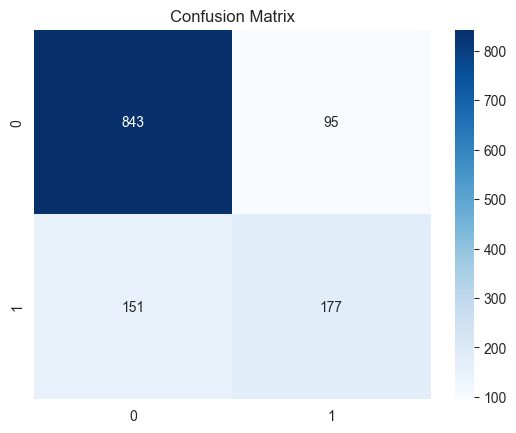

In [256]:
# 绘制混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

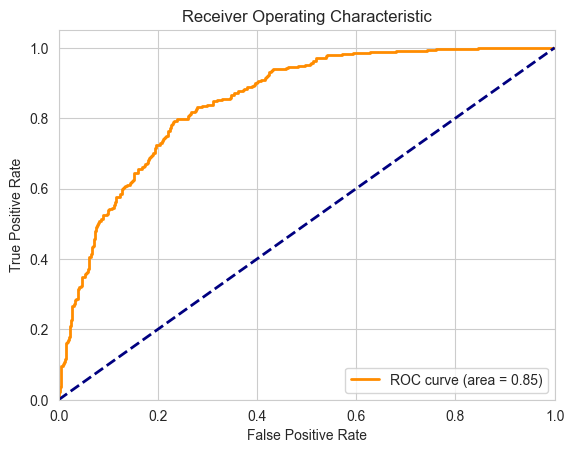

In [257]:
# 绘制 ROC 曲线
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()